# LangChain DataFrame Agent

In [1]:
from langchain.agents import create_pandas_dataframe_agent
from langchain.chat_models import ChatOpenAI
from langchain.agents.agent_types import AgentType
from langchain.llms import OpenAI
import pandas as pd

In [2]:
%load_ext lab_black

In [3]:
titanic_csv_url = (
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)
df = pd.read_csv(titanic_csv_url)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Ask a question:
- What's the average age of men who survived

In [20]:
df.query("Survived == 1 and Sex == 'male'")["Age"].mean()

27.276021505376345

# Create and LLM Agent that will do this for us.

In [21]:
agent = create_pandas_dataframe_agent(
    ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613"),
    df,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
agent.run("What's the average age of men who survived?")



> Entering new  chain...

Invoking: `python_repl_ast` with `df[df['Survived'] == 1]['Age'][df['Sex'] == 'male'].mean()`


27.276021505376345The average age of men who survived is approximately 27.28 years.

> Finished chain.


'The average age of men who survived is approximately 27.28 years.'

# Lets make it a little harder.

- What is the difference in fare paid by passengers who survived and passengers who didn't.

In [38]:
(
    df.groupby("Survived")["Fare"].mean().values[1]
    - df.groupby("Survived")["Fare"].mean().values[0]
)

26.27752071709328

In [39]:
df.groupby("Survived")["Fare"].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [37]:
df.groupby("Survived")["Fare"].mean().diff()

Survived
0          NaN
1    26.277521
Name: Fare, dtype: float64

In [40]:
agent.run(
    "What is the difference in fare paid by passengers who survived and passengers who didn't?"
)



> Entering new  chain...

Invoking: `python_repl_ast` with `df.groupby('Survived')['Fare'].mean()`


Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64The average fare paid by passengers who did not survive is 22.12, while the average fare paid by passengers who survived is 48.40. Therefore, the difference in fare paid by passengers who survived and passengers who didn't is 26.28.

> Finished chain.


"The average fare paid by passengers who did not survive is 22.12, while the average fare paid by passengers who survived is 48.40. Therefore, the difference in fare paid by passengers who survived and passengers who didn't is 26.28."

# Different Dataset
- Baby names
- Question: What were the top 5 female names in the year 2021

In [3]:
df = pd.read_csv("../046-babynames-popularity/names.csv")

In [4]:
df.query("Year == 2021 and Sex == 'F'").sort_values(
    "Count", ascending=False
).head().reset_index(drop=True)

,Name,Sex,Count,Year
0,Olivia,F,17728,2021
1,Emma,F,15433,2021
2,Charlotte,F,13285,2021
3,Amelia,F,12952,2021
4,Ava,F,12759,2021


In [24]:
df.columns

Index(['Name', 'Sex', 'Count', 'Year'], dtype='object')

In [5]:
agent = create_pandas_dataframe_agent(
    ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613"),
    df,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
)

In [6]:
agent.run("What were the top 5 female names in the year 2021?")



> Entering new  chain...

Invoking: `python_repl_ast` with `df[df['Year'] == 2021][df['Sex'] == 'F'].nlargest(5, 'Count')`


              Name Sex  Count  Year
1535489     Olivia   F  17728  2021
1535490       Emma   F  15433  2021
1535491  Charlotte   F  13285  2021
1535492     Amelia   F  12952  2021
1535493        Ava   F  12759  2021

<string>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


The top 5 female names in the year 2021 are:

1. Olivia - 17,728 occurrences
2. Emma - 15,433 occurrences
3. Charlotte - 13,285 occurrences
4. Amelia - 12,952 occurrences
5. Ava - 12,759 occurrences

> Finished chain.


'The top 5 female names in the year 2021 are:\n\n1. Olivia - 17,728 occurrences\n2. Emma - 15,433 occurrences\n3. Charlotte - 13,285 occurrences\n4. Amelia - 12,952 occurrences\n5. Ava - 12,759 occurrences'

## Question about the total dataset.

In [7]:
import matplotlib.pyplot as plt

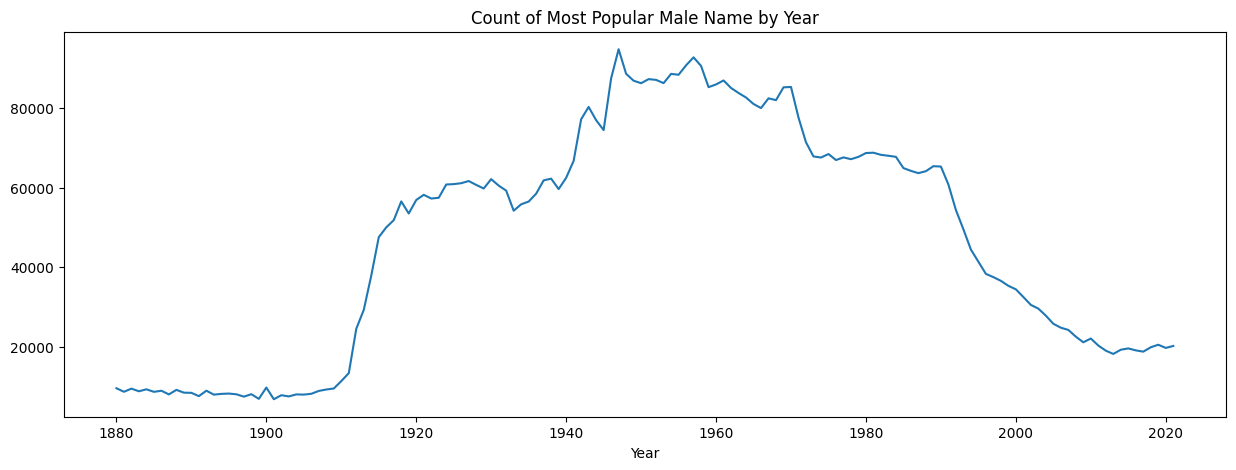

In [8]:
df.query('Sex == "M"').sort_values("Count", ascending=False).groupby("Year").first()[
    "Count"
].plot(figsize=(15, 5), title="Count of Most Popular Male Name by Year")
plt.show()

In [9]:
df.query('Sex == "M"').sort_values("Count", ascending=False).groupby(
    "Year"
).first().sort_values("Count", ascending=False)

,Name,Sex,Count
Year,,,
1947,James,M,94762
1957,Michael,M,92723
1956,Michael,M,90715
1958,Michael,M,90574
1948,James,M,88595
...,...,...,...
1891,John,M,7680
1903,John,M,7608
1897,John,M,7550


## Question:
- Find the year in this dataset where the male name occured the most out of any male names of all time. What was the year and the name?

In [11]:
agent.run(
    "What was the year and name of the male name with the highest count of all time?"
)



> Entering new  chain...


OutputParserException: Could not parse tool input: {'name': 'python', 'arguments': "df[df['Sex']=='M'].loc[df['Count'].idxmax(), ['Year', 'Name']]"} because the `arguments` is not valid JSON.

In [16]:
# df[df['Sex']=='M'].loc[df['Count'].idxmax(), ['Year', 'Name']]

In [17]:
df.loc[df[df["Sex"] == "M"]["Count"].idxmax(), ["Year", "Name"]]

Year     1947
Name    James
Name: 1840360, dtype: object

In [19]:
%%timeit
df.loc[df[df["Sex"] == "M"]["Count"].idxmax(), ["Year", "Name"]]

133 ms ± 2.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%%timeit
df.query('Sex == "M"').sort_values("Count", ascending=False).groupby(
    "Year"
).first().sort_values("Count", ascending=False).head(1)

245 ms ± 5.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
print(df.describe().to_markdown())

|       |           Count |           Year |
|:------|----------------:|---------------:|
| count |     2.05278e+06 |    2.05278e+06 |
| mean  |   176.292       | 1977.63        |
| std   |  1492.57        |   34.6709      |
| min   |     5           | 1880           |
| 25%   |     7           | 1954           |
| 50%   |    12           | 1988           |
| 75%   |    32           | 2006           |
| max   | 99693           | 2021           |
